### Data description
This scene was gathered by AVIRIS sensor over the Indian Pines test site in North-western Indiana and consists of 145\times145 pixels and 224 spectral reflectance bands in the wavelength range 0.4–2.5 10^(-6) meters. This scene is a subset of a larger one. The Indian Pines scene contains two-thirds agriculture, and one-third forest or other natural perennial vegetation. There are two major dual lane highways, a rail line, as well as some low density housing, other built structures, and smaller roads. Since the scene is taken in June some of the crops present, corn, soybeans, are in early stages of growth with less than 5% coverage. The ground truth available is designated into sixteen classes and is not all mutually exclusive. We have also reduced the number of bands to 200 by removing bands covering the region of water absorption: [104-108], [150-163], 220. Indian Pines data are available through Pursue's univeristy MultiSpec site.

In [22]:
import numpy as np
import matplotlib as mpl
#mpl.use('TkAgg')
import matplotlib.pyplot as plt
#%matplotlib inline
from mpl_toolkits import mplot3d
from dataloader import Dataloader
from preprocess import create_table, create_test_set
from preprocess import data_preprocess, remove_class
from preprocess import resample_dataset, hotellings_t2, inspect_outliers, normalize
from preprocess import remove_outliers

In [23]:
# Load data
dir_path = '../data/Hyperspectral/'
data_file = 'indian_pines.mat'
cali_file = 'calibration.mat'
labels_file = 'indian_pines_gt.mat'
dataloader = Dataloader(dir_path, data_file, cali_file, labels_file)

# Create tables, resample and create test set
X = dataloader.get_calibrated_samples()
Y = dataloader.get_labels()
W = dataloader.get_wave_lengths()
X = create_table(X)
Y = create_table(Y)
X, Y = resample_dataset(X, Y, 4.0)
X_train, Y_train, X_test, Y_test = create_test_set(X, Y, test_frac=0.30)

In [24]:
m,n=X.shape
print(m,n)
print(W.shape,X[0,:].shape)

1214 220
(220,) (220,)


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\danno\anaconda3\envs\TTK4260\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\danno\anaconda3\envs\TTK4260\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "C:\Users\danno\anaconda3\envs\TTK4260\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "C:\Users\danno\anaconda3\envs\TTK4260\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\danno\anaconda3\envs\TTK4260\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\danno\anaconda3\envs\TTK4260\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.R

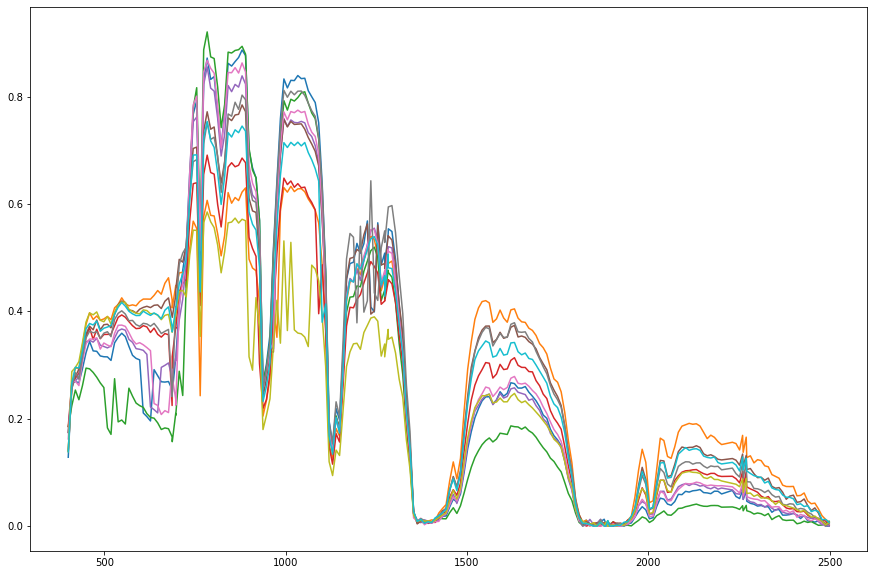

In [28]:
plt.figure(figsize=(15,10))
for i in range(10):
    plt.plot(W,X[i,:])
plt.show(block=False)

https://engineering.purdue.edu/~biehl/MultiSpec/hyperspectral.html

http://lesun.weebly.com/hyperspectral-data-set.html#

In [5]:
plt.contourf(X.T)
plt.show()

In [28]:
X_train.shape

(851, 220)

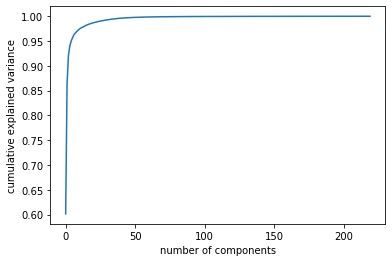

In [29]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [33]:
P=pca.components_
T = X_train.dot(P.T)

In [63]:
X_reconstrt=T[:,0:2].dot(P[0:2,:])

In [64]:
(X_reconstrt-X_train)/X_train

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[-0.94163845, -0.9174477 , -0.87934713, ...,         inf,
         0.23144966, -0.26900925],
       [-0.88561009, -0.85116489, -0.78694167, ...,  0.32229655,
         1.04920073,  2.1873983 ],
       [-0.95483432, -0.95401583, -0.91854848, ...,  0.23329319,
        -0.12399571,         inf],
       ...,
       [-0.90618504, -0.80360115, -0.75250865, ...,  1.38204974,
         0.25230916, -0.03120594],
       [-0.89045768, -0.77767626, -0.72855999, ...,  0.60712857,
        -0.31357772,  2.7211663 ],
       [-0.90504196, -0.80333396, -0.75088887, ...,  0.59973491,
         0.26074755,  2.43680096]])

In [65]:
Y_train

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

# To Do

* Show how much you can compress the data

* Analyze the noise to see if valuable information is not discarded